In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('dark')
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
pd.options.display.max_columns = None

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


## Data Cleaning and Visualization

Convert some object to numeric because these features supposed to be numeric, like 10k, 20k, 5k, and etc. 

In [5]:
df[['10k','25k','35k','30k','5k','half','20k','40k']] = df[['10k','25k','35k','30k','5k','half','20k','40k']].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31934 non-null float64
name         31984 non-null object
division     31984 non-null int64
25k          31768 non-null float64
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31950 non-null float64
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null float64
5k           31932 non-null float64
half         31912 non-null float64
20k          31933 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float64
dtypes: float64(10), int64(4), object(7)
memory usage: 5.1+ MB


In [6]:
#Check Null values
df.isnull().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [0]:
#feature ctz has lots of null values. I will drop the whole column here. We have
#2576 out of 30k null values for state feature. We will drop the those rows, and
#we will drop other rows with null values as well. 

df.drop(['ctz'], axis=1, inplace=True)
df.dropna(axis='rows', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 20 columns):
10k          29103 non-null float64
name         29103 non-null object
division     29103 non-null int64
25k          29103 non-null float64
gender       29103 non-null object
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null object
genderdiv    29103 non-null int64
35k          29103 non-null float64
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null object
30k          29103 non-null float64
5k           29103 non-null float64
half         29103 non-null float64
20k          29103 non-null float64
country      29103 non-null object
city         29103 non-null object
40k          29103 non-null float64
dtypes: float64(10), int64(4), object(6)
memory usage: 4.7+ MB


Next, let's explore the dataset a little bit. First, we will plot numeric features against with the final finish time, and we will seperate it by gender and division. 

In [9]:
df['division'].nunique()

6897

In [0]:
#Our dataset is kind of large so I random sampled 1000 data points
#for plotting. 
df_random_plot = df.sample(n=1000,random_state=4)

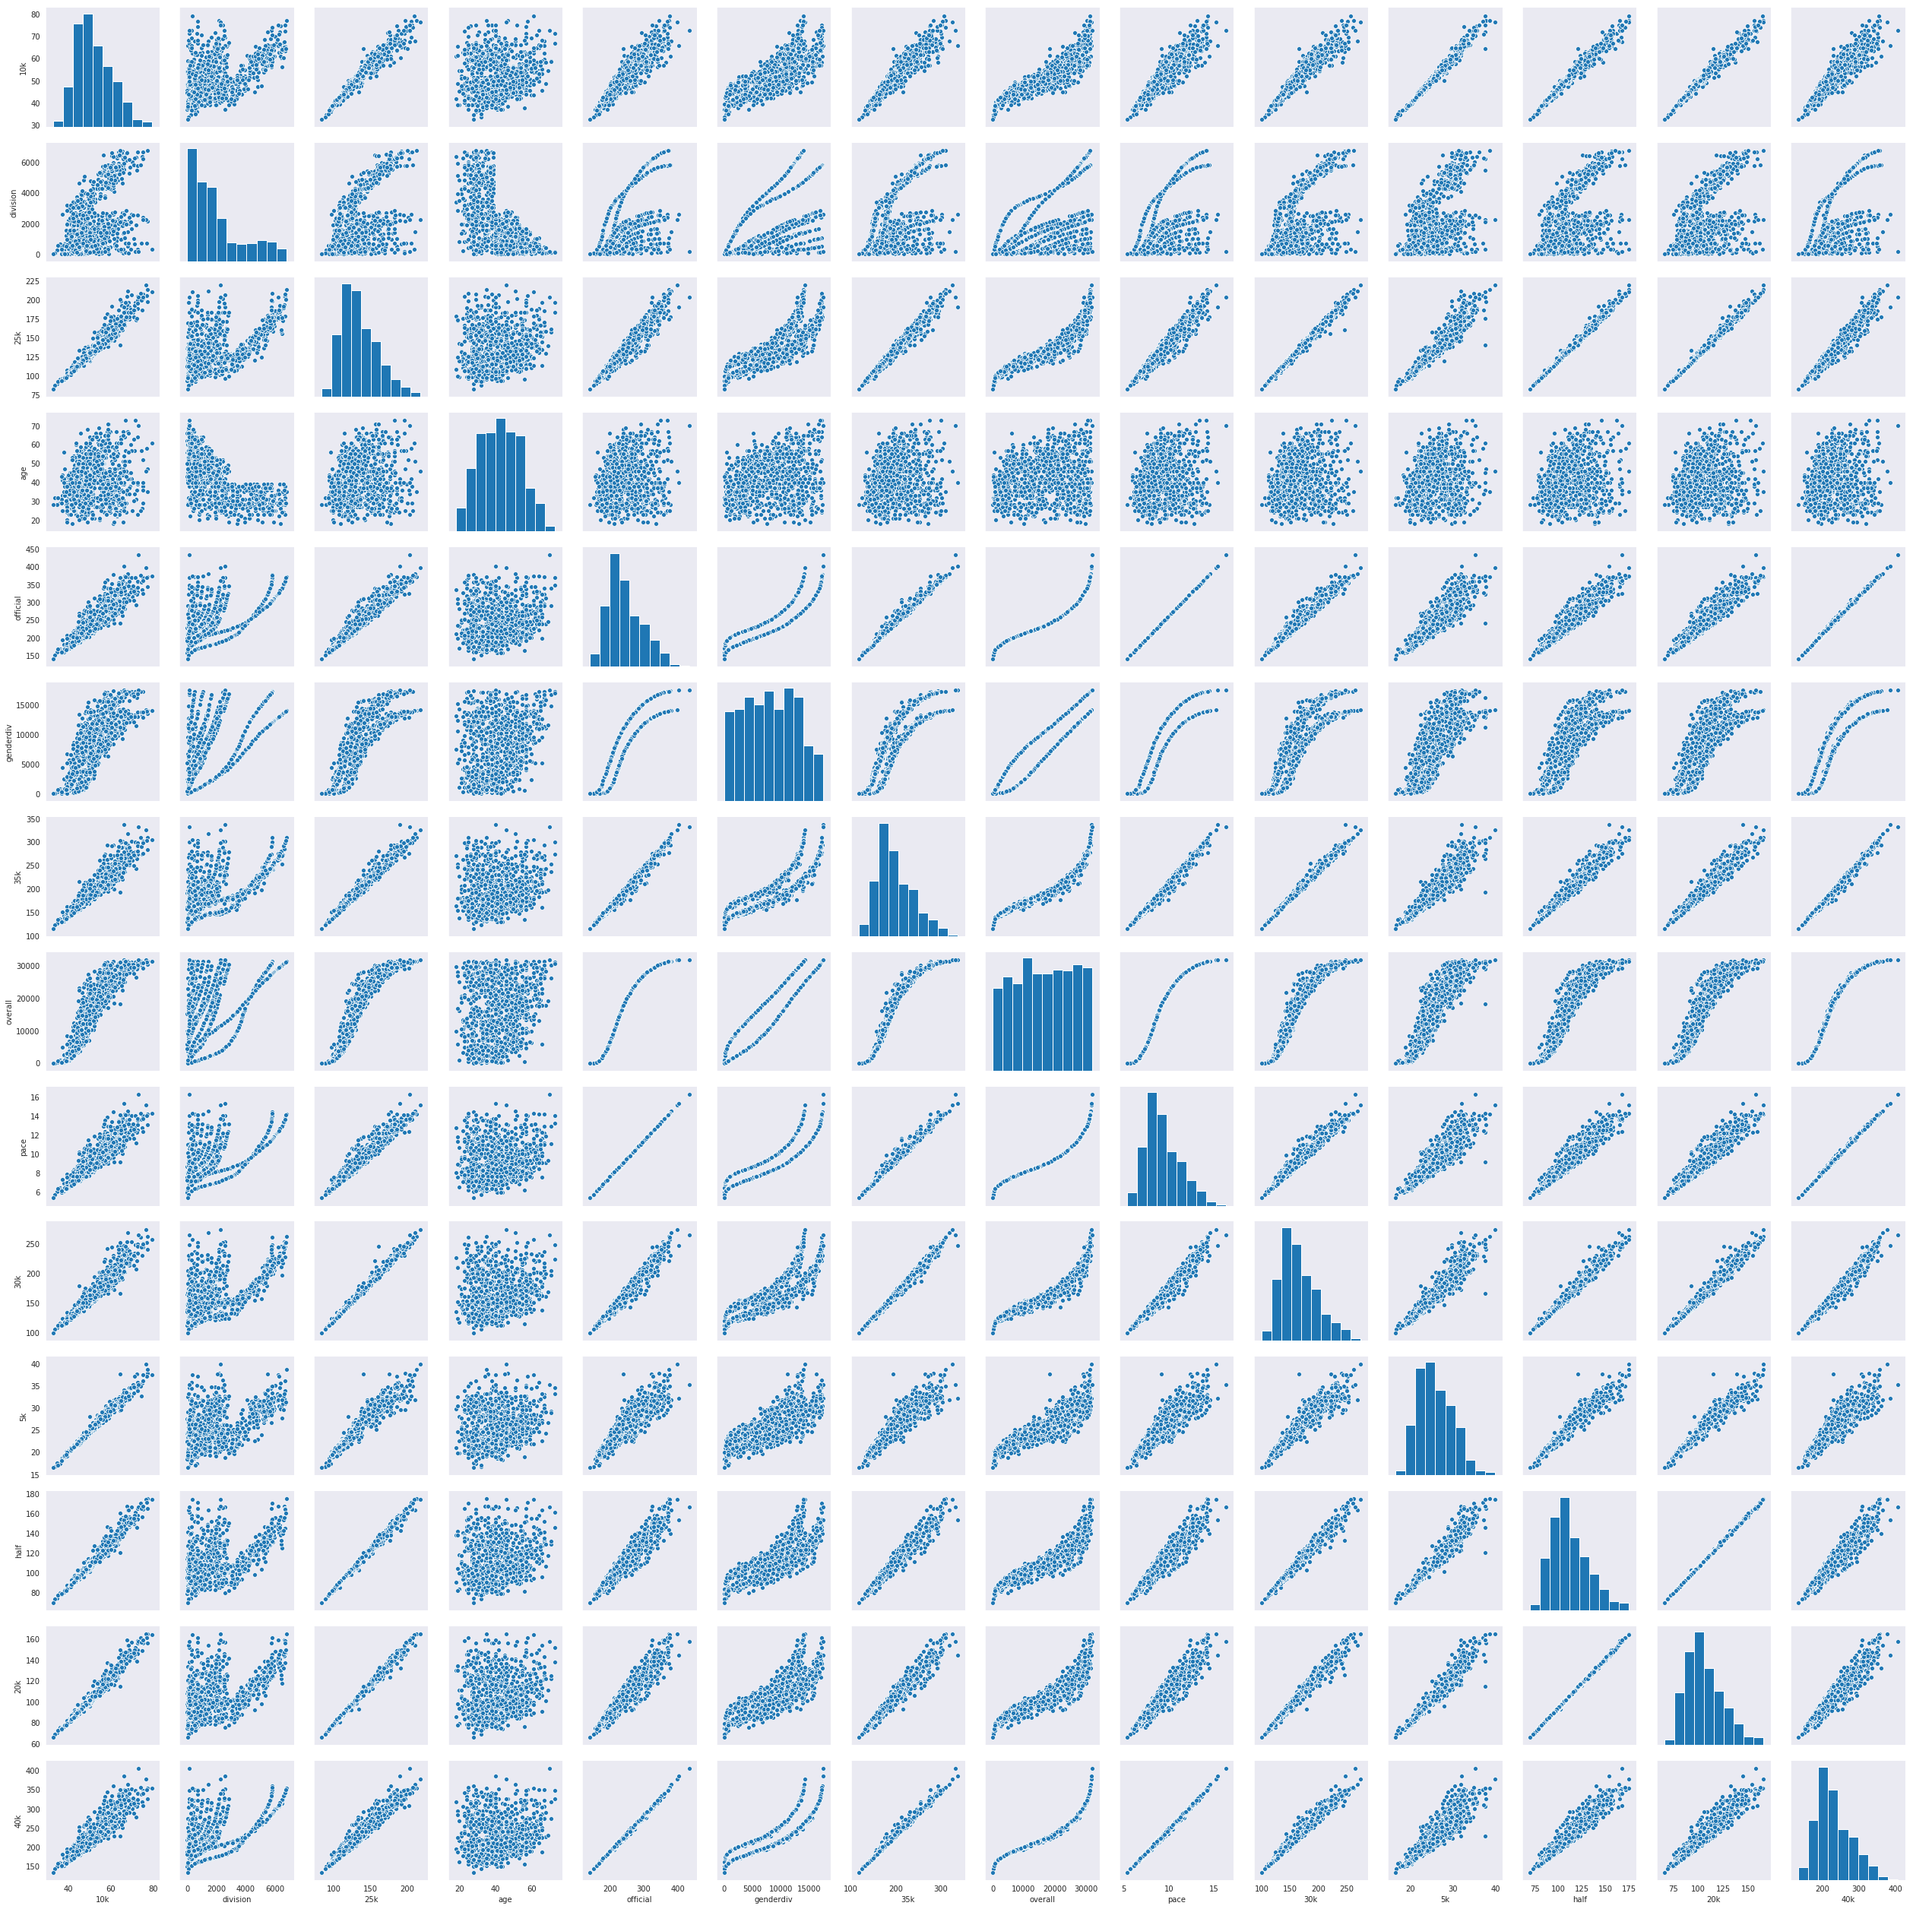

In [39]:
g = sns.pairplot(df_random_plot)
g = g.add_legend()
plt.show()

According to the pair plots, we can see that male and female data points have large overlap area. Using the original data with scatter plots is hard to differentiate the two groups and create clusters. Next, we will use PCA to reduce the dimension of our dataset first, and then try different clustering techniques to see which one performs better. For PCA, we will check cumulative variance explained by n dimension features and try to keep the number of features that can explain 90% of our original dataset. 

### PCA

In [0]:
from sklearn.preprocessing import normalize
from sklearn import decomposition

df_numeric = df[['10k','25k','35k','30k','5k','half','20k','40k',
                 'official','pace']]

rows = df_numeric.shape[0] - df_numeric.shape[0] % 4
df_numeric = df_numeric.iloc[:rows, :]

X = df_numeric
X_norm = normalize(X)

X_pca_test = decomposition.PCA().fit(X_norm)

Next, we plot the cumulative Explained Variance vs. Number of Features, and check at what number of features, we can explain 90% of the variance of our original dataset. 

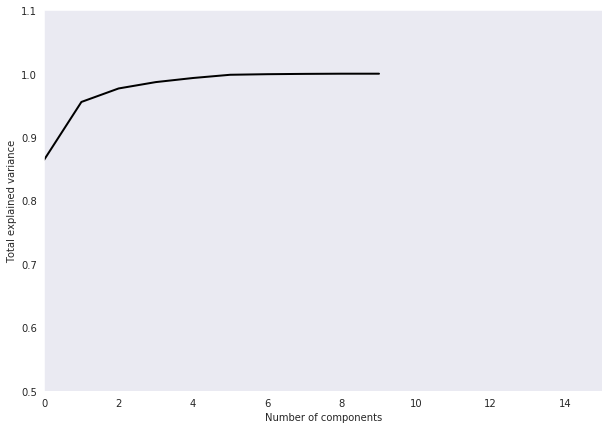

The Cumulative Explained Variance:
[0.86439571 0.95545568 0.97672739 0.98676481 0.9932142  0.99830989
 0.99922737 0.99971551 0.99999967 1.        ]


In [13]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(X_pca_test.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 15)
plt.yticks(np.arange(0.5, 1.1, 0.1))
plt.show()

print('The Cumulative Explained Variance:')
print(np.cumsum(X_pca_test.explained_variance_ratio_))

Accoridng to above graphic and the list of cumulative explained variance, we know that we can reduce the feature dimension down to 2 features and still explain 99% of the variance of our original dataset. 

Next, we will first seperate our dataset into 4 different smaller subsets, and then use K-mean on all these
4 smaller subsets. This is to check if our cluster will look similar in each of the subset. Also, I will try K-mean with different clusters range from 2 clusters to 10 clusters. 

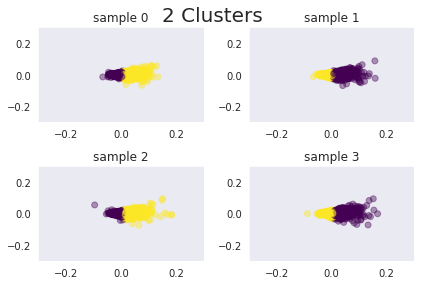

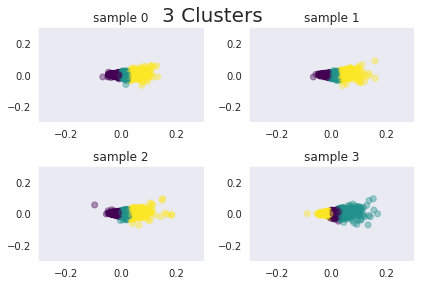

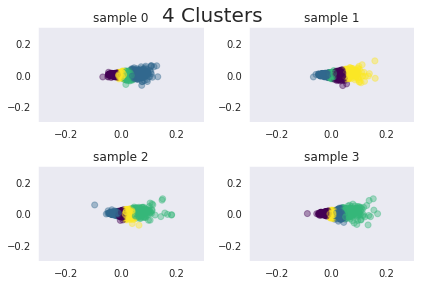

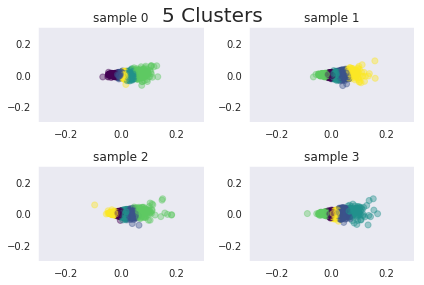

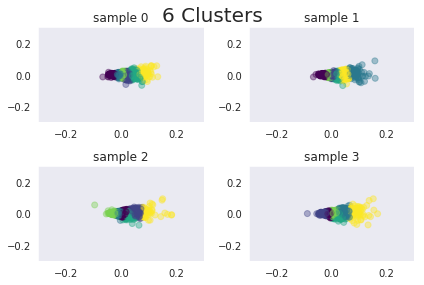

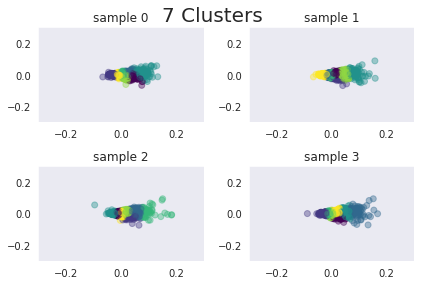

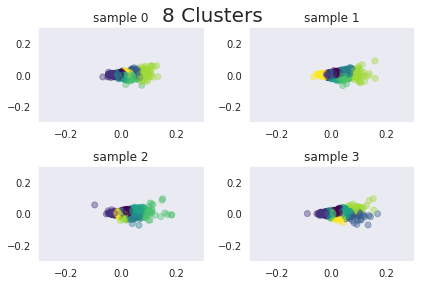

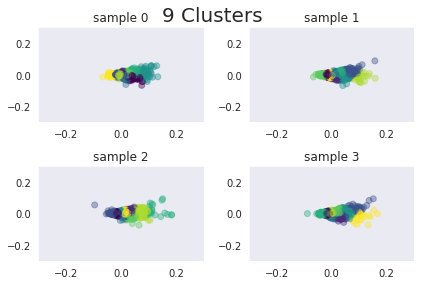

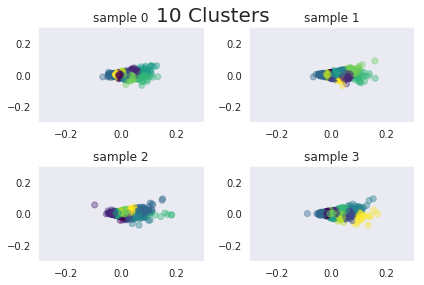

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X_pca = decomposition.PCA(n_components=2).fit_transform(X_norm)


X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,X_pca,test_size=0.5,random_state=42)

X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,X_pcahalf1,test_size=0.5,random_state=42)

X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,X_pcahalf2,test_size=0.5,random_state=42)



ypred=pd.DataFrame()
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 11):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        

for cluster in range(2, 11):
    
    f, axarr = plt.subplots(2, 2)
    
    for i in range(4):
        
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub,y_sub,c=c,cmap='viridis',alpha = 0.4)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

After getting our clusters, we need to evaluate which number of cluster is best for our analysis. I will use two different method here to evaluate our clusters. The first method is Silhouette Score method. The silhouette score will range from -1 to 1, which -1 means very bad clusters, and 1 means very dense clusters. The next method I used to evaluate the clusters is elbow method. The elbow method  choose the good k number of clusters based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow.

### Silhouette Method

In [0]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

sil_score_mean = []

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=42).fit(X_pca)
    labels = model.labels_
    sil_score_mean.append(metrics.silhouette_score(X_pca, labels, metric='euclidean'))

In [43]:
sil_score_mean

[0.5420796279034643,
 0.4787267252438101,
 0.4396414697680606,
 0.402641581327547,
 0.3725929270451202,
 0.3696651542987059,
 0.3639773227237387,
 0.3522822785487739,
 0.35735109795631964]

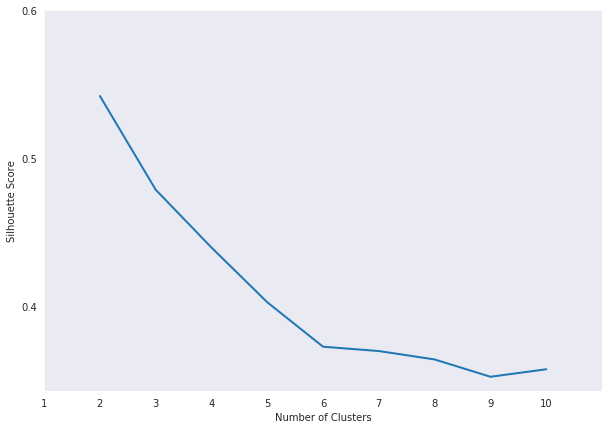

In [44]:
num_cluster = [2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10,7))
plt.plot(num_cluster,sil_score_mean, lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xlim(1, 11)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0.4, 0.7, 0.1))
plt.show()

After getting the Silhouette Score with different cluster size and plot it on the graph, we can see that with 2 clusters, we have our best Silhouette scores. 

### Elbow Method

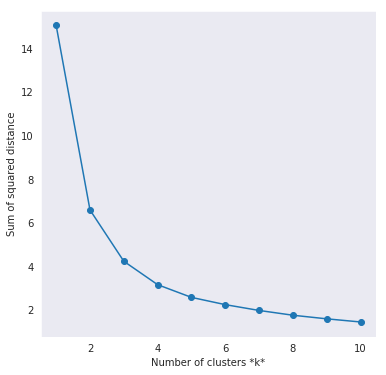

In [45]:
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_pca)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

However, according to our elbow method, which is based on SSE between data points and their cluster centroids, the best k number of cluster is 4 or 5 clusters. 

Our original dataset have lots of overlaps if we use gender to seperate our data. Our clusters also return back a very interesting shape if we use PCA data for K-mean. Therefore, I would like to explore how our clusters looks like if we use our normalizaed data instead of PCA data. Next, I will try the k-mean method with 4 clusters using normalized dataset. 

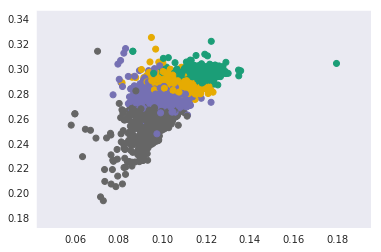

In [47]:
Y_pred_norm = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y_pred_norm, cmap='Dark2')
plt.show()

Using the normalized dataset produced a little different plot compare to plots we saw for PCA data previously. We have a chunck of data points in the middle, and more scatter around at the tail and left side. We also have an outliner on the right but catgorized as the green cluster. 